<a href="https://colab.research.google.com/github/chetanstpt/NLP-Womens-Clothings-Reviews/blob/master/nlp_women_s_clothings_reviews_(Final).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
 
 
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
 
import os
for dirname, _, filenames in os.walk("/content/Womens Clothing E-Commerce Reviews.csv"):
    for filename in filenames:
        print(os.path.join(dirname, filename))
 
# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Analysis of women's clothes reviews
Exploratory data analysis of women's clothes reviews.

The dataset comes from https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews.

#Variables: 
1. Clothing ID (numeric): specific piece being reviewed;
2. Age (numeric): reviewers age;
3. Title (text): title of the review;
4. Review Text (text): review text;
5. Rating (numeric): product score granted by the customer from 1 Worst, to 5 Best;
6. Recommended IND (numeric): customer recommends the product where 1 is recommended, 0 is not recommended;
7. Positive Feedback Count (numeric): number of other customers who found this review positive;
8. Division Name (text): name of the product high level division;
9. Department Name (text): name of the product department name;
10. Class Name (text): name of the product class name.

# Importing the Dataset

In [47]:
###Import Pandas and Numpy Libraries
import numpy as np
import pandas as pd


In [48]:
df=pd.read_csv('/content/Womens Clothing E-Commerce Reviews.csv',header=0,index_col=0)
df.head()

Clothing ID  Age  ... Department Name Class Name
0          767   33  ...        Intimate  Intimates
1         1080   34  ...         Dresses    Dresses
2         1077   60  ...         Dresses    Dresses
3         1049   50  ...         Bottoms      Pants
4          847   47  ...            Tops    Blouses

[5 rows x 10 columns]

# EDA: Exploratory data analysis

In [7]:
#### To change the column name unnamed 0 to userID and Clothing ID to ClothingID
df.rename(columns={"Unnamed: 0": "UserID", "Clothing ID": "ClothingID","Recommended IND": "Recommended", "Review Text": "Review"}, inplace = True);
df.head(5)                #### Give 1st 5 observations

UserID  ClothingID  Age  ...   Division Name Department Name  Class Name
0       0         767   33  ...       Initmates        Intimate   Intimates
1       1        1080   34  ...         General         Dresses     Dresses
2       2        1077   60  ...         General         Dresses     Dresses
3       3        1049   50  ...  General Petite         Bottoms       Pants
4       4         847   47  ...         General            Tops     Blouses

[5 rows x 11 columns]

In [4]:
# Shape of Dataset
df.shape

(23486, 11)

In [5]:
# Types of variables
df.dtypes


UserID                      int64
ClothingID                  int64
Age                         int64
Title                      object
Review                     object
Rating                      int64
Recommended                 int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

In [6]:
# Summary of variables
df.describe()

UserID    ClothingID  ...   Recommended  Positive Feedback Count
count  23486.000000  23486.000000  ...  23486.000000             23486.000000
mean   11742.500000    918.118709  ...      0.822362                 2.535936
std     6779.968547    203.298980  ...      0.382216                 5.702202
min        0.000000      0.000000  ...      0.000000                 0.000000
25%     5871.250000    861.000000  ...      1.000000                 0.000000
50%    11742.500000    936.000000  ...      1.000000                 1.000000
75%    17613.750000   1078.000000  ...      1.000000                 3.000000
max    23485.000000   1205.000000  ...      1.000000               122.000000

[8 rows x 6 columns]

In [7]:
#######Look up a random review
df["Review"][100]       ## get 100th observation 

"At first i wasn't sure about it. the neckline is much lower and wavy than i thought. but after wearing it, it really is comfortable. it stretches a lot, so i wear a cami underneath so when i lean forward i'm not showing the world my torso."

In [8]:
#Unique entry in each column
df.nunique()


UserID                     23486
ClothingID                  1206
Age                           77
Title                      13993
Review                     22634
Rating                         5
Recommended                    2
Positive Feedback Count       82
Division Name                  3
Department Name                6
Class Name                    20
dtype: int64

In [9]:
# Null Entries
df.isna().sum()


UserID                        0
ClothingID                    0
Age                           0
Title                      3810
Review                      845
Rating                        0
Recommended                   0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

## Removing NA form Data:


In [8]:
#### Removing NA
df_temp=df.dropna(subset=["Review","Division Name","Department Name","Class Name"])
df_temp=df_temp.reset_index(drop=True)
print(df_temp)

       UserID  ClothingID  Age  ...   Division Name Department Name  Class Name
0           0         767   33  ...       Initmates        Intimate   Intimates
1           1        1080   34  ...         General         Dresses     Dresses
2           2        1077   60  ...         General         Dresses     Dresses
3           3        1049   50  ...  General Petite         Bottoms       Pants
4           4         847   47  ...         General            Tops     Blouses
...       ...         ...  ...  ...             ...             ...         ...
22623   23481        1104   34  ...  General Petite         Dresses     Dresses
22624   23482         862   48  ...  General Petite            Tops       Knits
22625   23483        1104   31  ...  General Petite         Dresses     Dresses
22626   23484        1084   28  ...         General         Dresses     Dresses
22627   23485        1104   52  ...  General Petite         Dresses     Dresses

[22628 rows x 11 columns]


In [11]:
#List unique division names
df_temp['Division Name'].value_counts()

General           13365
General Petite     7837
Initmates          1426
Name: Division Name, dtype: int64

In [12]:
df_temp["Department Name"].value_counts()


Tops        10048
Dresses      6145
Bottoms      3662
Intimate     1653
Jackets      1002
Trend         118
Name: Department Name, dtype: int64

In [13]:
df_temp['Class Name'].value_counts()

Dresses           6145
Knits             4626
Blouses           2983
Sweaters          1380
Pants             1350
Jeans             1104
Fine gauge        1059
Skirts             903
Jackets            683
Lounge             669
Swim               332
Outerwear          319
Shorts             304
Sleep              214
Legwear            158
Intimates          147
Layering           132
Trend              118
Casual bottoms       1
Chemises             1
Name: Class Name, dtype: int64

In [14]:
df_temp['Rating'].value_counts()

5    12527
4     4908
3     2823
2     1549
1      821
Name: Rating, dtype: int64

In [15]:
#Number of items with no division
df_temp.isnull().sum()


UserID                        0
ClothingID                    0
Age                           0
Title                      2966
Review                        0
Rating                        0
Recommended                   0
Positive Feedback Count       0
Division Name                 0
Department Name               0
Class Name                    0
dtype: int64

# Data preparation

The dataset contains several variables such as Age, Title, Ratiing, Positive Feedback Count, Division Name, Department Name and Class name. In this case we used only variables Review, Recommended ,Positive Feedback Count,Age,Class Name, Department Name as a predictor and Rating is target class variable.

Review  is a review from customers and will be used as predictor variable.

Recommended is a recommendation from customers, where the product 1 is recommended, 0 is not recommended and will be used as target variable.

In [9]:
df_temp=df_temp[['Review', 'Rating', 'Recommended', 'Positive Feedback Count', 'Age', 'Class Name', 'Department Name']]
df_temp.head()

Review  ...  Department Name
0  Absolutely wonderful - silky and sexy and comf...  ...         Intimate
1  Love this dress!  it's sooo pretty.  i happene...  ...          Dresses
2  I had such high hopes for this dress and reall...  ...          Dresses
3  I love, love, love this jumpsuit. it's fun, fl...  ...          Bottoms
4  This shirt is very flattering to all due to th...  ...             Tops

[5 rows x 7 columns]

### Checking  Null values

In [17]:
df_temp.isnull().sum()

Review                     0
Rating                     0
Recommended                0
Positive Feedback Count    0
Age                        0
Class Name                 0
Department Name            0
dtype: int64

In [18]:
df_temp.shape

(22628, 7)

### Plots of an individual variables:

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 1.0, 'Distribution of Rating')

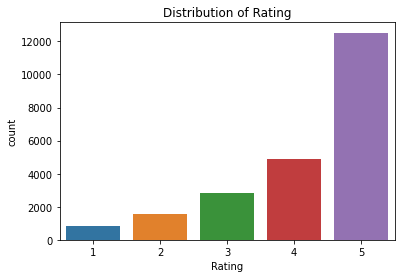

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='Rating',data=df_temp)
plt.title("Distribution of Rating")

###### Conclusion : The figure shows that the most reviews are positive (rating 5) than negative

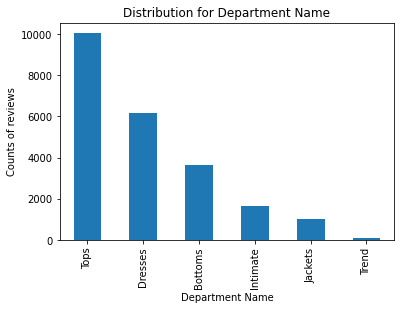

In [20]:
 
df_temp['Department Name'].value_counts().plot(kind='bar', title='Distribution for Department Name')
plt.xlabel("Department Name")
plt.ylabel("Counts of reviews")
plt.show()

#### The figure shows that the most reviews products are tops and dresses.

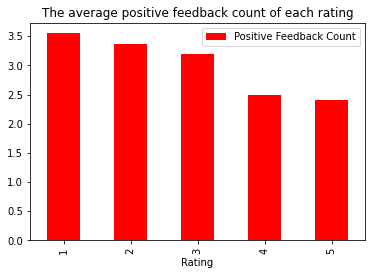

In [21]:
df_temp.groupby('Rating')[['Positive Feedback Count']].mean().sort_values('Rating', ascending=True).plot(kind='bar', 
                                                color=['Red'], title='The average positive feedback count of each rating');

### Selecting specific data from columns:

In [22]:
df_temp.loc[df_temp['Rating'] == 1].head()

Review  ...  Department Name
61   3 tags sewn in, 2 small (about 1'' long) and 1...  ...         Intimate
85   I was really hoping to like this, but it did n...  ...             Tops
94   I usually wear a medium and bought a small. it...  ...             Tops
95   I was very excited to order this top in red xs...  ...             Tops
107  This is so thin and poor quality. especially f...  ...             Tops

[5 rows x 7 columns]

### Rating greater than 3 and Age <30

In [23]:
df_temp.loc[(df_temp['Rating'] > 3.0) & (df_temp['Age'] < 30)].head(10)

Review  ...  Department Name
8   I love this dress. i usually get an xs but it ...  ...          Dresses
29  This sweater is so comfy and classic - it bala...  ...             Tops
32  These pants are even better in person. the onl...  ...          Bottoms
36  This is a comfortable skirt that can span seas...  ...          Bottoms
42  This poncho is so cute i love the plaid check ...  ...             Tops
62  I recently got this on sale after looking at i...  ...             Tops
72  I have a short torso and this works well for m...  ...             Tops
89  I bought this top online in the burnt orange c...  ...             Tops
91  This top is so much prettier in real life than...  ...             Tops
92  This shirt caught my eye because of how beauti...  ...             Tops

[10 rows x 7 columns]

#### **Conclusion** : 7 customers give rating 5 and 3 customers give rating 4 who Age <30.

#### Products having rating >4 

In [24]:
df_temp['Class Name'].where(df['Rating'] > 4).count()

12682

#### Sum of Positive feedback count

In [25]:
df_temp.groupby('Rating')['Positive Feedback Count'].count().sort_values(ascending=False)

Rating
5    12527
4     4908
3     2823
2     1549
1      821
Name: Positive Feedback Count, dtype: int64

## Correlation :

In [26]:
corr = df_temp.corr()
corr

Rating  ...       Age
Rating                   1.000000  ...  0.030121
Recommended              0.792543  ...  0.034312
Positive Feedback Count -0.060845  ...  0.040807
Age                      0.030121  ...  1.000000

[4 rows x 4 columns]

##### In the above figure we can see that the variables are strongly correlated with themselves and strong relationship found between Rating and Recommended variables.

# Conclusion:
We performed exploratory data analysis of women's clothes reviews. We analyzed and plots individual variables. We also counted the summary statistics such as mean, trimmed mean, weighted mean and median. We have determined skewed distribution and correlation as well. At the end the outliers identification have beed established.

# Data Preprocessing for Text Mining 

The dataset contains several variables such as Age, Title, Ratiing, Positive Feedback Count, Division Name, Department Name and Class name. In this case we used only two variables Review Text and Recommended IND as a predictor and target class variable.

### Review 
is a review from customers and will be used as predictor variable.

### Recommended 
is a recommendation from customers, where the product 1 is recommended, 0 is not recommended and will be used as target variable.

In [10]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
stops=stopwords.words("english")
import sys

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
review=df_temp[['Review','Recommended']]
pd.DataFrame(review)
def tokens(words):
    words = re.sub("[^a-zA-Z]"," ", words)
    text = words.lower().split()
    return " ".join(text)
 
review['Review_clear'] = review['Review'].apply(tokens)
review.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Review  ...                                       Review_clear
0  Absolutely wonderful - silky and sexy and comf...  ...  absolutely wonderful silky and sexy and comfor...
1  Love this dress!  it's sooo pretty.  i happene...  ...  love this dress it s sooo pretty i happened to...
2  I had such high hopes for this dress and reall...  ...  i had such high hopes for this dress and reall...
3  I love, love, love this jumpsuit. it's fun, fl...  ...  i love love love this jumpsuit it s fun flirty...
4  This shirt is very flattering to all due to th...  ...  this shirt is very flattering to all due to th...

[5 rows x 3 columns]

# WordCloud - Repetition of words
Now we create a Word Clouds for reviews, representing most common words in each target class.

Word cloud is a excellent way to represent text data, where the size and color of each word appears in the wordcloud show its frequency or importance.

In [12]:
positive=review.loc[review['Recommended'] == 1]
positive.head()

Review  ...                                       Review_clear
0  Absolutely wonderful - silky and sexy and comf...  ...  absolutely wonderful silky and sexy and comfor...
1  Love this dress!  it's sooo pretty.  i happene...  ...  love this dress it s sooo pretty i happened to...
3  I love, love, love this jumpsuit. it's fun, fl...  ...  i love love love this jumpsuit it s fun flirty...
4  This shirt is very flattering to all due to th...  ...  this shirt is very flattering to all due to th...
6  I aded this in my basket at hte last mintue to...  ...  i aded this in my basket at hte last mintue to...

[5 rows x 3 columns]

In [13]:
Negative=review.loc[review['Recommended'] == 0]
Negative.head()

Review  ...                                       Review_clear
2   I had such high hopes for this dress and reall...  ...  i had such high hopes for this dress and reall...
5   I love tracy reese dresses, but this one is no...  ...  i love tracy reese dresses but this one is not...
10  Dress runs small esp where the zipper area run...  ...  dress runs small esp where the zipper area run...
22  First of all, this is not pullover styling. th...  ...  first of all this is not pullover styling ther...
25  Loved the material, but i didnt really look at...  ...  loved the material but i didnt really look at ...

[5 rows x 3 columns]

In [14]:
positive_words =[]
 
for i in positive.Review_clear:
    positive_words.append(i) 
positive_words = ' '.join(positive_words)
positive_words

'absolutely wonderful silky and sexy and comfortable love this dress it s sooo pretty i happened to find it in a store and i m glad i did bc i never would have ordered it online bc it s petite i bought a petite and am i love the length on me hits just a little below the knee would definitely be a true midi on someone who is truly petite i love love love this jumpsuit it s fun flirty and fabulous every time i wear it i get nothing but great compliments this shirt is very flattering to all due to the adjustable front tie it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan love this shirt i aded this in my basket at hte last mintue to see what it would look like in person store pick up i went with teh darkler color only because i am so pale hte color is really gorgeous and turns out it mathced everythiing i was trying on with it prefectly it is a little baggy on me and hte xs is hte msallet size bummer no petite i decided to jkeep it thou

In [15]:
 
negative_words = []
 
for j in Negative.Review_clear:
    negative_words.append(j)
negative_words = ' '.join(negative_words)
negative_words

'i had such high hopes for this dress and really wanted it to work for me i initially ordered the petite small my usual size but i found this to be outrageously small so small in fact that i could not zip it up i reordered it in petite medium which was just ok overall the top half was comfortable and fit nicely but the bottom half had a very tight under layer and several somewhat cheap net over layers imo a major design flaw was the net over layer sewn directly into the zipper it c i love tracy reese dresses but this one is not for the very petite i am just under feet tall and usually wear a p in this brand this dress was very pretty out of the package but its a lot of dress the skirt is long and very full so it overwhelmed my small frame not a stranger to alterations shortening and narrowing the skirt would take away from the embellishment of the garment i love the color and the idea of the style but it just did not work on me i returned this dress dress runs small esp where the zippe

# Word Cloud : Repetition of words

In [18]:
# Library for WordCloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt


## Most Common words in Recommended Review

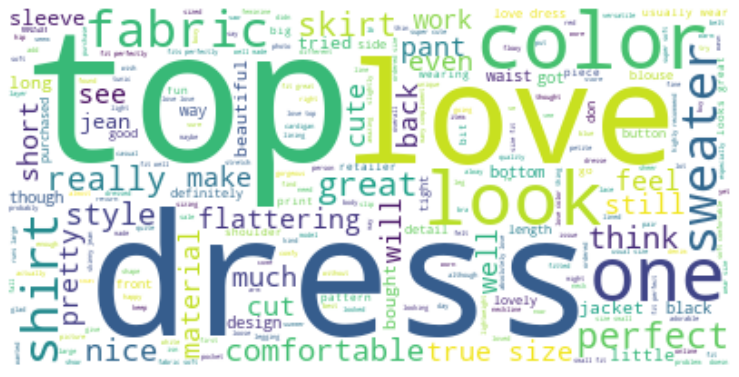

In [19]:
wordcloud = WordCloud(background_color="white", max_words=len(positive_words))

wordcloud.generate(positive_words)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

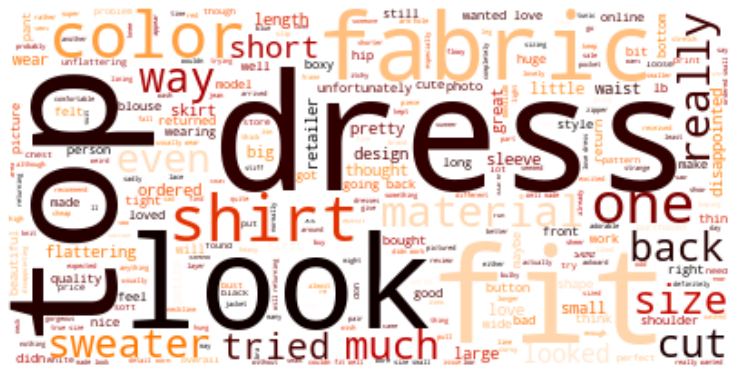

In [20]:

wordcloud = WordCloud(background_color="white", max_words=len(negative_words), colormap='gist_heat')

wordcloud.generate(negative_words)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# **Predictive Analysis  

## 
Data Cleaning , lower case ,Splitting , Porter streaming

In [21]:
corpus=[]
for i in range(0,22628):
    Review=re.sub("[^a-zA-Z]"," ", df_temp["Review"][i])
    Review=Review.lower()
    Review=Review.split()
    ps=PorterStemmer()
    Review=[ps.stem(word) for word in Review if not word in set(stops)]
    tocken=" ".join(Review)
    corpus.append(tocken)

# Supervised Learning Models




## Models

We use the following classification models:

Logistic Regression,
Naive Bayes,
Support Vector Machine,
Random Forest,
Ada Boosting.

## Creating the Bag of Words model


In [22]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = review.iloc[:, 1].values
len(cv.get_feature_names())

1500

## Splitting the dataset into the Training set and Test set

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

##  Training the Naive Bayes model on the Training set 

In [24]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB
multinomial = MultinomialNB()
multinomial.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [25]:
 
# Predicting the Test set results
y_pred = multinomial.predict(X_test)
 
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.8725143614670791
              precision    recall  f1-score   support

           0       0.65      0.71      0.68       857
           1       0.93      0.91      0.92      3669

    accuracy                           0.87      4526
   macro avg       0.79      0.81      0.80      4526
weighted avg       0.88      0.87      0.87      4526



## ROC Curve :

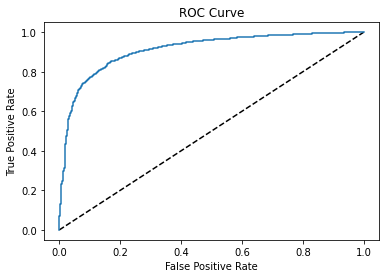

0.9110619008864519

In [26]:
from sklearn.metrics import roc_curve, roc_auc_score
 
# Compute predicted probabilities: y_pred_prob
y_probs = multinomial.predict_proba(X_test)
y_pred_prob = y_probs[:,1]
 
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
 
# Plot ROC curve
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
 
roc_auc_score(y_test, y_pred_prob)

## Logistics Regression :

In [27]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

## Predicted y
y_pred1=model.predict(X_test)

# Making the Confusion Matrix
print('accuracy %s' % accuracy_score(y_pred1, y_test))
print(classification_report(y_test, y_pred1))


accuracy 0.87870083959346
              precision    recall  f1-score   support

           0       0.73      0.56      0.64       857
           1       0.90      0.95      0.93      3669

    accuracy                           0.88      4526
   macro avg       0.82      0.76      0.78      4526
weighted avg       0.87      0.88      0.87      4526



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### ROC Curve for Logistic Regression 

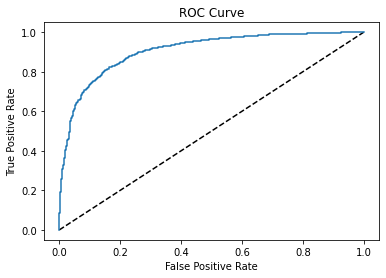

0.9058041880424244

In [28]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob1 = model.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob1)

# Plot ROC curve

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
roc_auc_score(y_test, y_pred_prob1)

# **XGBoost**:

In [33]:
## Import library for XGBoost
from xgboost import XGBClassifier

## Fitting XGBoost model on Training set : 
clf = XGBClassifier(random_state=0)
clf.fit(X_train,y_train)



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [34]:
## Predicting the model on test set:

y_pred3 = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred3))
print(classification_report(y_test, y_pred3))
print("accuracy %s" % accuracy_score(y_test,y_pred3))

[[ 249  608]
 [  63 3606]]
              precision    recall  f1-score   support

           0       0.80      0.29      0.43       857
           1       0.86      0.98      0.91      3669

    accuracy                           0.85      4526
   macro avg       0.83      0.64      0.67      4526
weighted avg       0.84      0.85      0.82      4526

accuracy 0.8517454706142289


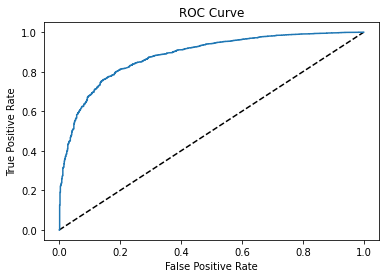

0.8821273064907565

In [32]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob3 = clf.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob3)

# Plot ROC curve
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
roc_auc_score(y_test, y_pred_prob3)

# **Random Forest :**

In [43]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(random_state=0,criterion = 'entropy',
                                  n_estimators=500)
model_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [44]:

# Predicting the Test set results
y_pred4 = model_rf.predict(X_test)
print(confusion_matrix(y_test, y_pred4))
print(classification_report(y_test, y_pred4))
print("accuracy %s" % accuracy_score(y_test,y_pred4))

[[ 266  591]
 [  43 3626]]
              precision    recall  f1-score   support

           0       0.86      0.31      0.46       857
           1       0.86      0.99      0.92      3669

    accuracy                           0.86      4526
   macro avg       0.86      0.65      0.69      4526
weighted avg       0.86      0.86      0.83      4526

accuracy 0.8599204595669465


##  Which model has best Accuracy ?

In [49]:
log_acc = accuracy_score(y_pred1, y_test)
nb_acc = accuracy_score(y_pred, y_test)
rf_acc = accuracy_score(y_pred4, y_test)
XGB = accuracy_score(y_pred3, y_test)

In [50]:
models = pd.DataFrame({
                      'Model': ['Logistic Regression', 'Naive Bayes', 'Random Forest', 'XGBoost'],
                      'Score': [log_acc, nb_acc, rf_acc, XGB]})
models.sort_values(by='Score', ascending=False)

Model     Score
0  Logistic Regression  0.878701
1          Naive Bayes  0.872514
2        Random Forest  0.859920
3              XGBoost  0.851745

# **Conclusion :**



  ##### This project was aimed to used sentiment analysis to determined product recommendation. We started with the EDA(Exploratory Data Analysis , Data Visualisation ,data cleaning and text mining, which cover change text into tokens, remove punctuation, numbers, stop words. Following we used bag of words model to convert the text into numerical feature vectors. we use CountVectorisation for bags for words.
 
  #####   We also done a Word Cloud on positive Reviews of recommonded items and negative reviews of non recommanded items for checking the most repeating words from reviews.              
#####Finally we started training 4 different Classification models and we got the best accuracy of 0.87 for Logistic Regression method.
